In [19]:
import scanpy as sc
import singleCellHaystack as hs

sc.set_figure_params(facecolor="white", dpi=90)

# Load data

In [20]:
adata = sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


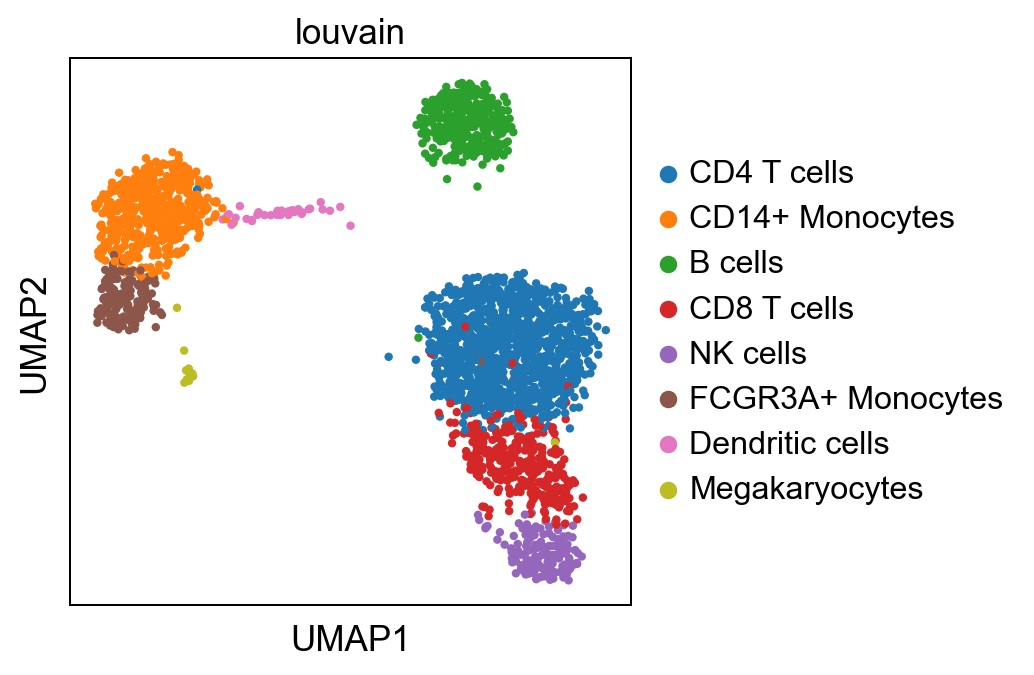

In [21]:
sc.pl.umap(adata, color="louvain")

# Run haystack

In [22]:
res = hs.haystack(adata.raw.to_adata(), coord="umap", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 features ...


100%|██████████| 13713/13713 [00:03<00:00, 4066.89it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:03<00:00, 27.34it/s]


> calculating P values ...
> done.


# QC

We can examine some of the QC plots. First the randomization fits. These are used to calculate KLD from randomized expression levels for a subset of genes, in order to estimate the values to the entire gene set.

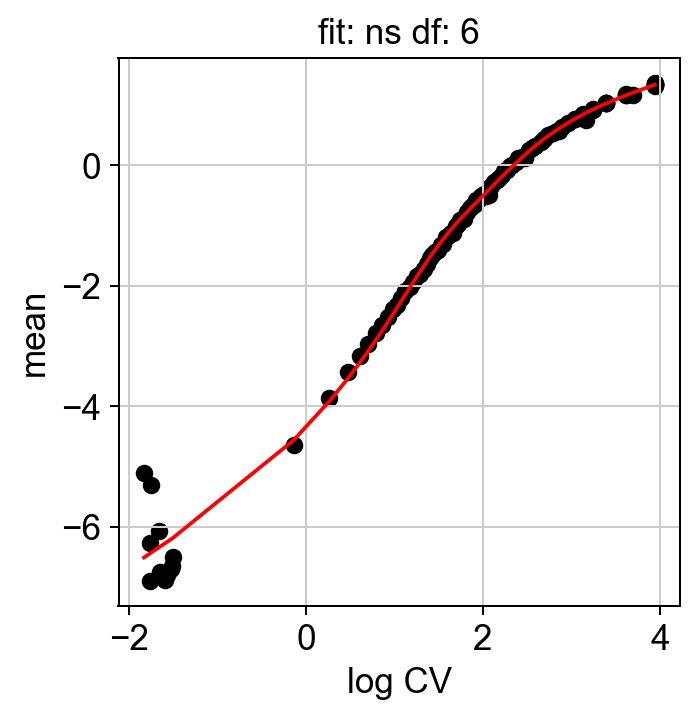

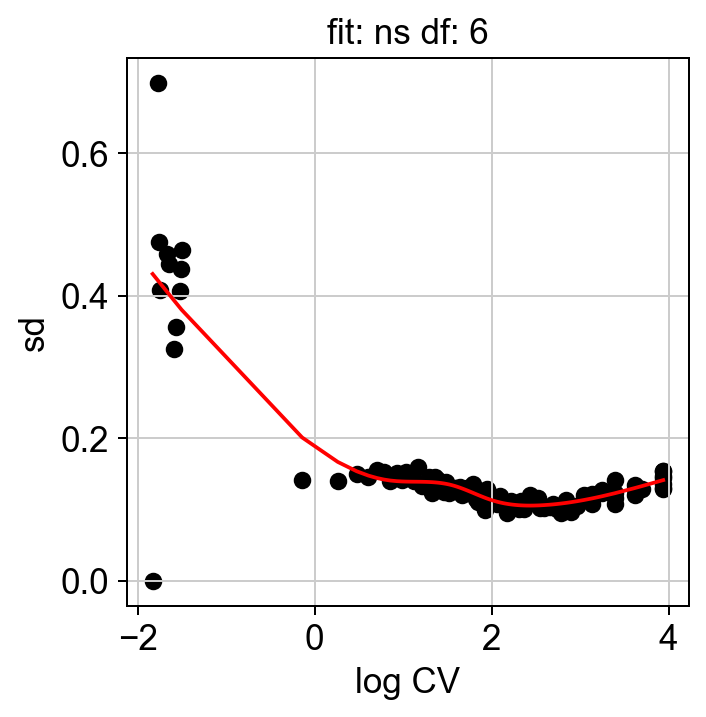

In [23]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

The ranking of logpval and distribution of pval gives us some idea of how many significant genes we can detect.

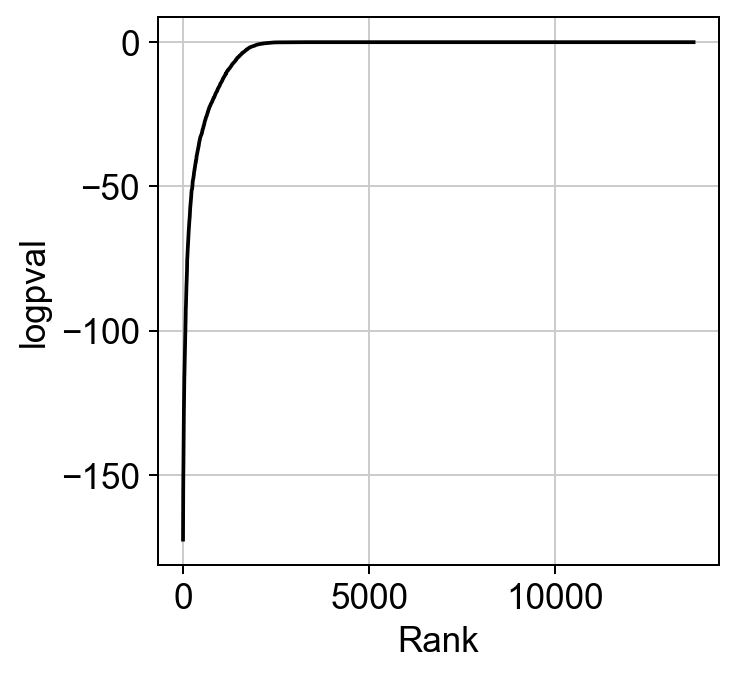

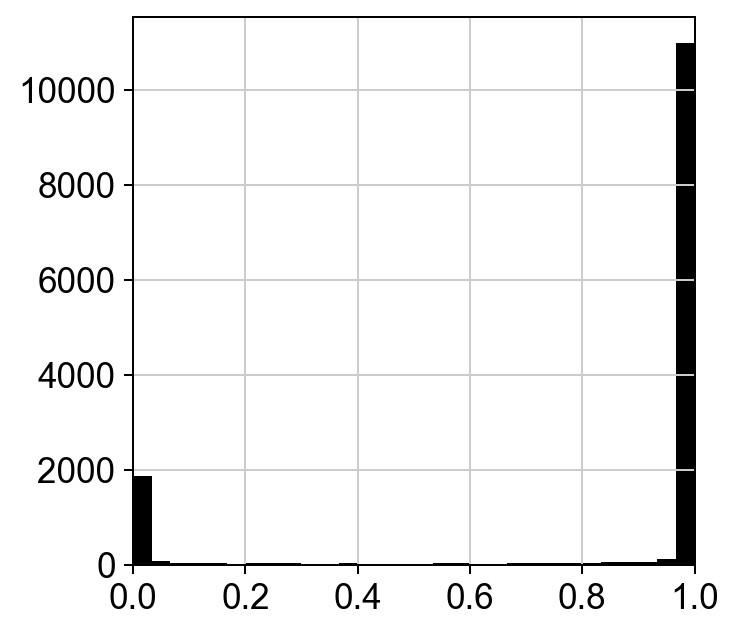

In [24]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

# Results

A pandas DataFrame with the results can be obtained. By default the results are sorted by logpval_adj.

In [25]:
sum = res["results"]
sum

,gene,KLD,pval,pval_adj,logpval,logpval_adj
12672,TYROBP,0.857776,4.160819e-173,5.705732e-169,-1.723808e+02,-168.243689
11877,CST3,0.841235,9.799262e-166,1.343773e-161,-1.650088e+02,-160.871674
1049,FCER1G,0.881896,1.636547e-164,2.244197e-160,-1.637861e+02,-159.648939
907,S100A9,0.976648,3.123385e-158,4.283098e-154,-1.575054e+02,-153.368242
4370,AIF1,0.790817,3.802102e-158,5.213823e-154,-1.574200e+02,-153.282844
...,...,...,...,...,...,...
6223,KIAA1429,0.455362,1.000000e+00,1.000000e+00,-1.431461e-44,0.000000
9270,RP11-468E2.4,0.455503,1.000000e+00,1.000000e+00,-3.473537e-45,0.000000
8410,MED21,0.528302,1.000000e+00,1.000000e+00,-1.712413e-45,0.000000
3044,TBCCD1,0.395643,1.000000e+00,1.000000e+00,-1.595332e-47,0.000000


Plot top 4 genes.

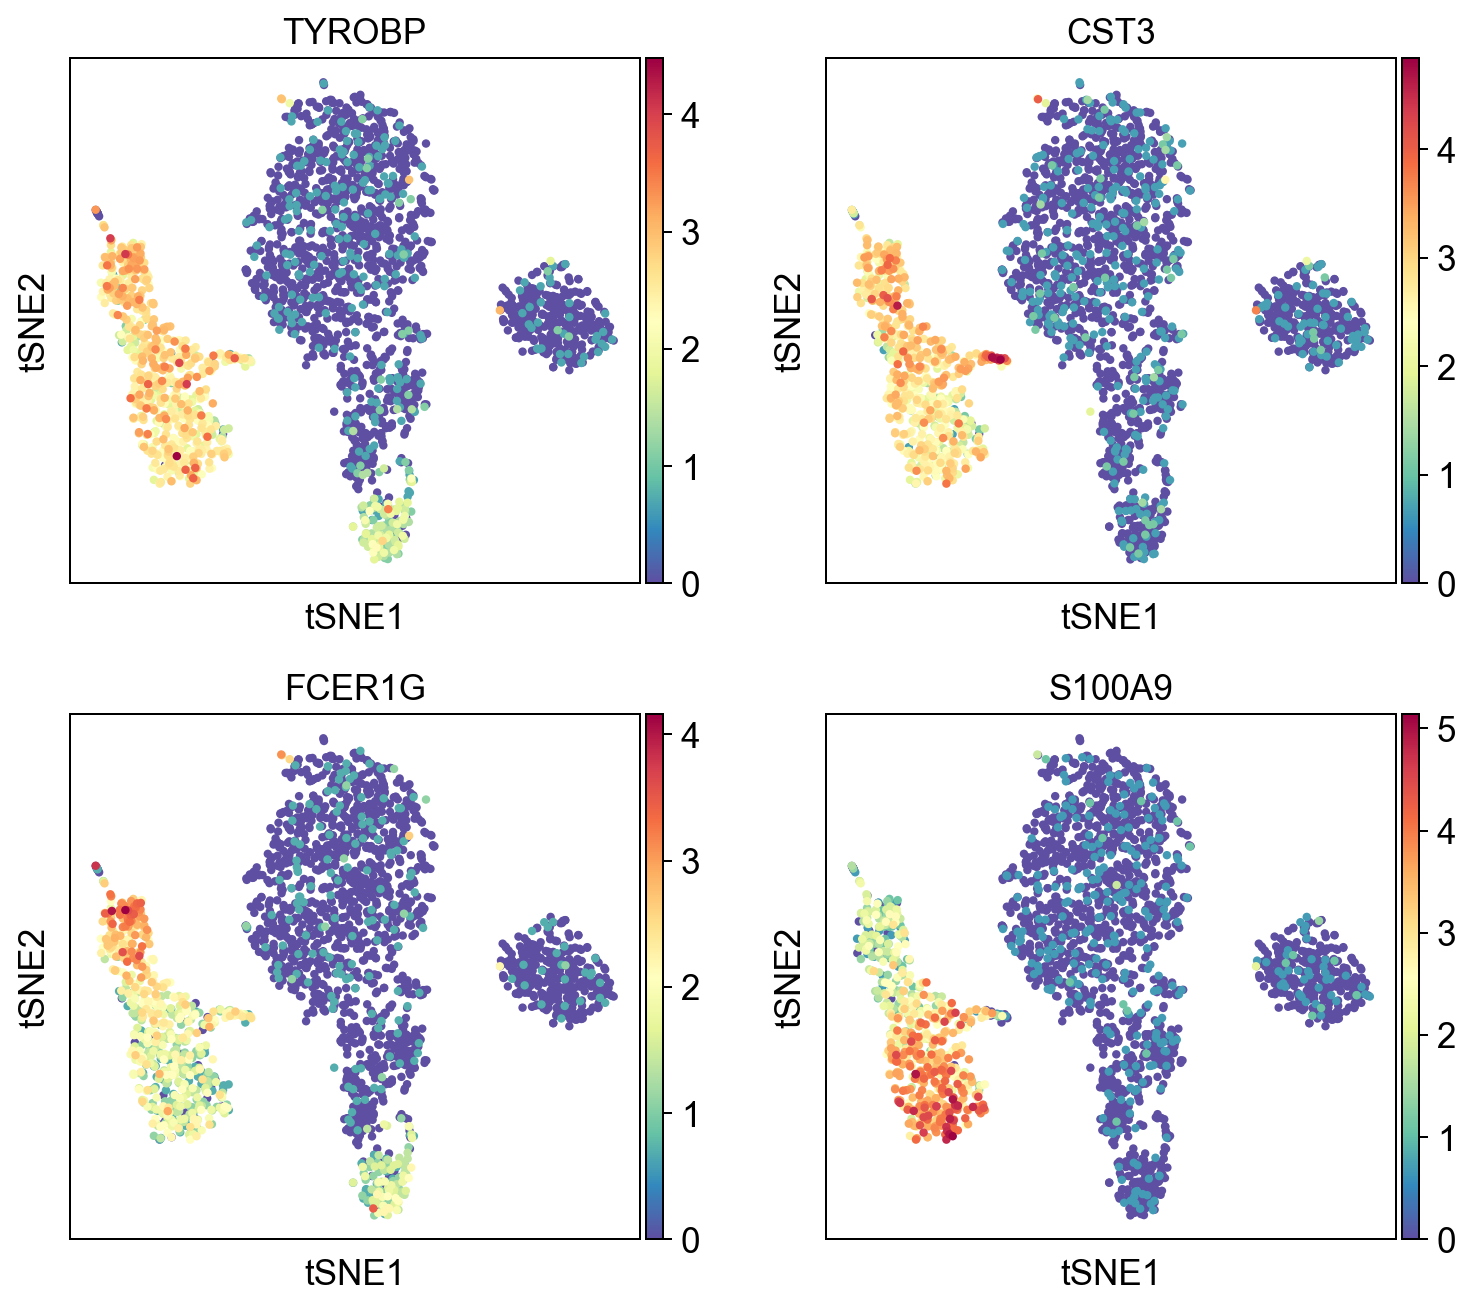

In [26]:
sc.pl.tsne(adata, color=sum.gene.iloc[:4], ncols=2, cmap="Spectral_r")

# Export results

In [27]:
#sum.to_csv("pbmc3k-results.tsv")